# Quantum Grover's Algorithm

In [9]:
import pandas as pd
import numpy as np
from math import gcd
from qiskit import *
from qiskit.extensions import *
from qiskit.visualization import plot_histogram

## Variables

In [10]:
index = 452758
N = 16
n_qubits = len("{0:b}".format(N)) - 1
y = index % N
y_bin = "{0:b}".format(y).zfill(n_qubits)

print('Number of elements: {N}'.format(N = N))
print('Required number of qubits: {qubits}'.format(qubits = n_qubits))
print('Searched item: {y}'.format(y = y))
print('Searched item binary: {y_bin}'.format(y_bin = y_bin))

Number of elements: 16
Required number of qubits: 4
Searched item: 6
Searched item binary: 0110


## Part 1: Initialize

In [11]:
def init(circ, n_qubits):

    for i in range(n_qubits):
        circ.h(i)

    circ.barrier()

    return circ

## Part 2: Oracle

In [12]:
def oracle(n_qubits):

    oracle = QuantumCircuit(n_qubits)

    U_NxN = np.diag(np.full(N, 1))    

    U_NxN[y][y] = -1

    oracle = UnitaryGate(U_NxN)
    oracle.name = " Oracle"

    return oracle

## Part 3: Diffuser

In [13]:
def diffuser(n_qubits):
    diffuser = QuantumCircuit(n_qubits)

    for qubit in range(n_qubits):
        diffuser.h(qubit)

    for qubit in range(n_qubits):
        diffuser.x(qubit)

    diffuser.h(n_qubits-1)
    diffuser.mct(list(range(n_qubits-1)), n_qubits - 1)
    diffuser.h(n_qubits-1)

    for qubit in range(n_qubits):
        diffuser.x(qubit)

    for qubit in range(n_qubits):
        diffuser.h(qubit)

    diffuser = diffuser.to_gate()
    diffuser.name = " Diffuser"
    
    return diffuser

## Circuit

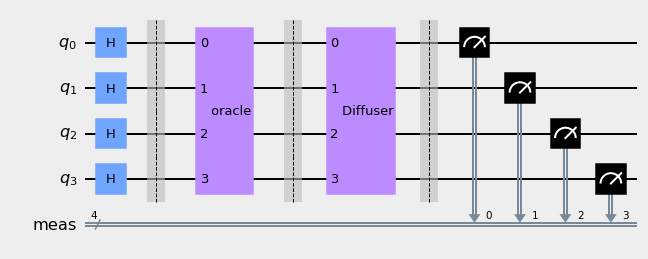

In [14]:
# create circuit
circ = QuantumCircuit(n_qubits)

# initialize
circ = init(circ, n_qubits)

# oracle
circ.append(oracle(n_qubits), list(range(n_qubits)))

circ.barrier()

# diffuser
circ.append(diffuser(n_qubits), list(range(n_qubits)))

# measures
circ.measure_all()

# display circuit
display(circ.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'}))

## Results

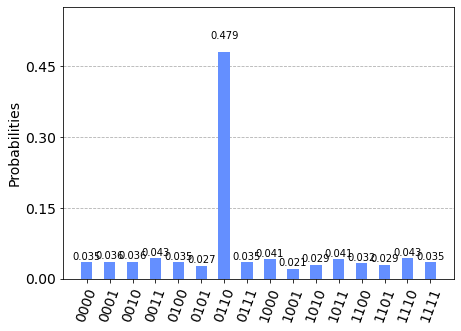

In [15]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(circ, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)